# Good visualization
> Let's visualize some decision boundaries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from geomstats.visualization import plot as gplot
from geomstats.geometry.hyperbolic import Hyperbolic

from sklearn.model_selection import train_test_split

# from src.hyperdt.toy_data import generate_gaussian_mixture_hyperboloid
from src.hyperdt.toy_data import wrapped_normal_mixture
from src.hyperdt.tree import HyperbolicDecisionTreeClassifier
from src.hyperdt.visualization import _get_geodesic, plot_tree, plot_boundary, plot_tree

INFO: Using numpy backend


In [3]:
# Some matplotlib settings

# Line width 4
plt.rc('lines', linewidth=4)

# Font size 20
plt.rc('font', size=20)

# Title font size 20
plt.rc('axes', titlesize=20)

# Subtitle font size 20
plt.rc('axes', labelsize=20)

# Tick font size 20
plt.rc('xtick', labelsize=20)

# Outlines for points
plt.rc('patch', force_edgecolor=True,
       edgecolor='black', linewidth=1)

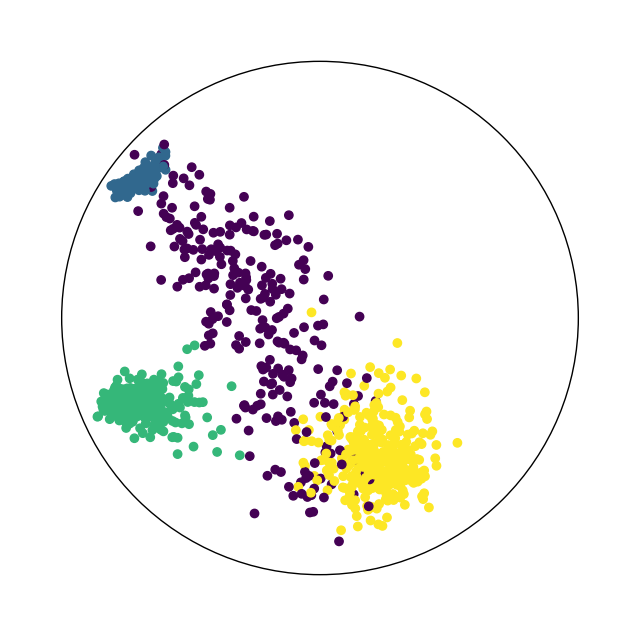

In [4]:
# Some data

X, y = wrapped_normal_mixture(num_points=1000, num_classes=4, noise_std=0.3, seed=2)

# plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax = gplot(X, c=y, space="H2_poincare_disk")
plt.show()

In [5]:
# Split into train and test sets; train HDT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

hdt = HyperbolicDecisionTreeClassifier(timelike_dim=0, max_depth=3)
hdt.fit(X_train, y_train)

hdt_score = hdt.score(X_test, y_test)
print(hdt_score)

0.92


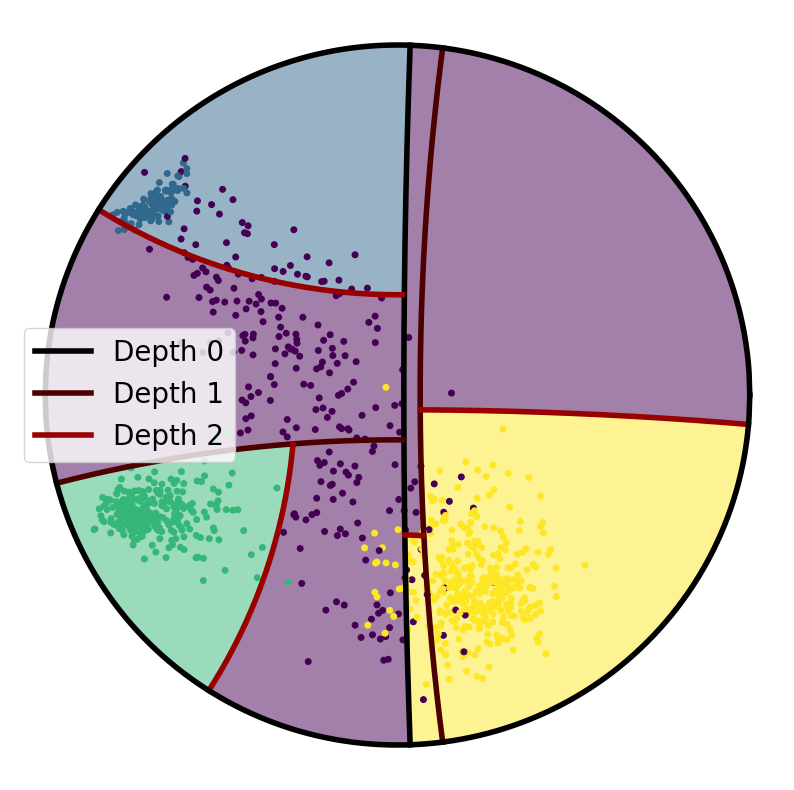

In [6]:
# Use the default axes to make something prettier for the paper

ax = plot_tree(hdt, X=X, y=y)

# Fatten up lines
for line in ax.lines:
    line.set_linewidth(4)

# Turn off axes
ax.set_axis_off()

/tmp/ipykernel_2027706/496434521.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("gist_heat", hdt.max_depth * 2)  # 2x keeps colors from being too light


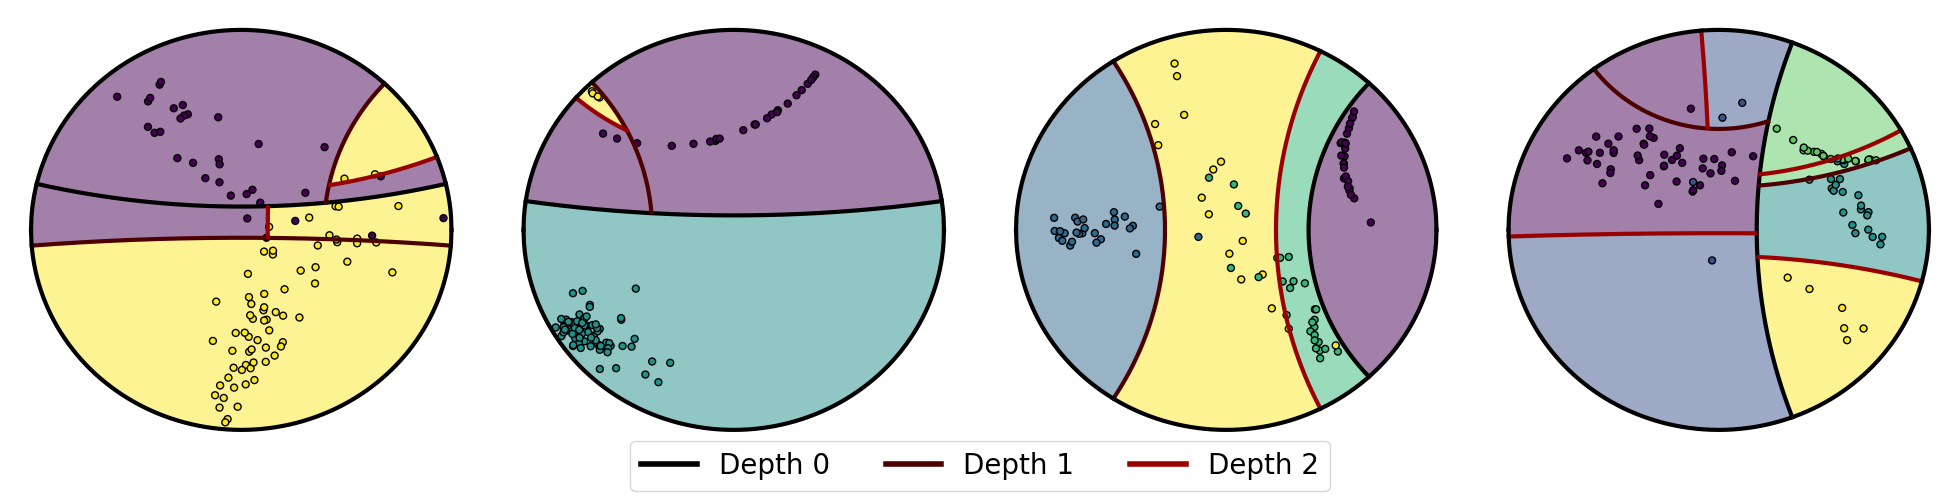

In [18]:
# Try this for 3 different seeds - this takes about a minute

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, (ax, seed, n_classes) in enumerate(zip(axs, [6, 8, 10, 13], [2, 3, 4, 5])):
    X, y = wrapped_normal_mixture(num_points=100, num_classes=n_classes, noise_std=0.3, seed=seed)
    hdt = HyperbolicDecisionTreeClassifier(timelike_dim=0, max_depth=3)
    hdt.fit(X, y)
    ax = plot_tree(hdt, X=X, y=y, ax=ax)
    ax.set_axis_off()
    ax.legend_ = None

    # Change line width
    for line in ax.lines:
        line.set_linewidth(3)

fig.tight_layout()

# Set fake legend
cmap = plt.cm.get_cmap("gist_heat", hdt.max_depth * 2)  # 2x keeps colors from being too light
colors = [cmap(i) for i in range(hdt.max_depth)]
fig.legend(
    handles=[plt.Line2D([0], [0], color=c, label=f"Depth {i}") for i, c in enumerate(colors)],
    ncol=3,
    loc="lower center",
    fontsize=20,
    bbox_to_anchor=(0.5, -0.05),
)